### 🧠 Matiks Data Analyst Task
 **Objective:**  Analyze user behavior data to identify key patterns, early signs of churn, high-value users, and provide actionable suggestions to improve retention and revenue."


### 📦 1. Load and Preview the Data

In this section, we load the Excel file containing user data for analysis. We check the available sheets and preview their contents to understand the structure of the dataset.

**Steps:**
- Import required libraries  
- Load the Excel file  
- List all available sheet names  
- Preview the first few rows of each sheet  

This helps us determine what kind of information is available (e.g., sessions, users, events) and guides the next steps in the analysis.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load data
df = pd.read_excel("Matiks Data Analyst Data.xlsx", sheet_name="Sheet1")

# Convert dates
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Login'] = pd.to_datetime(df['Last_Login'])

# Add behavioral columns
df['Days_Active'] = (df['Last_Login'] - df['Signup_Date']).dt.days
df['Sessions_Per_Day'] = df['Total_Play_Sessions'] / df['Days_Active'].replace(0, np.nan)
df['Avg_Play_Time_Per_Session'] = (df['Total_Hours_Played'] * 60) / df['Total_Play_Sessions']


### 📊 2. User Behavioral Patterns
**Goal:**Identify how users interact with the platform – such as active days, usage frequency, and session habits.
#### ➤ Active Days Analysis  We calculate the number of days each user was active to understand overall engagement trends.
#### ➤ Session Frequency We analyze how often users return to the platform and how many sessions they have per user.
**✅ Insight:**
- Majority of users are active on specific days (e.g., weekdays/weekends).
- High-frequency users return every few days, while low-frequency users may be at risk of churn.

<ipython-input-9-6aef385a6f21>:11: UserWarning: Glyph 128377 (\N{JOYSTICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128377 (\N{JOYSTICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


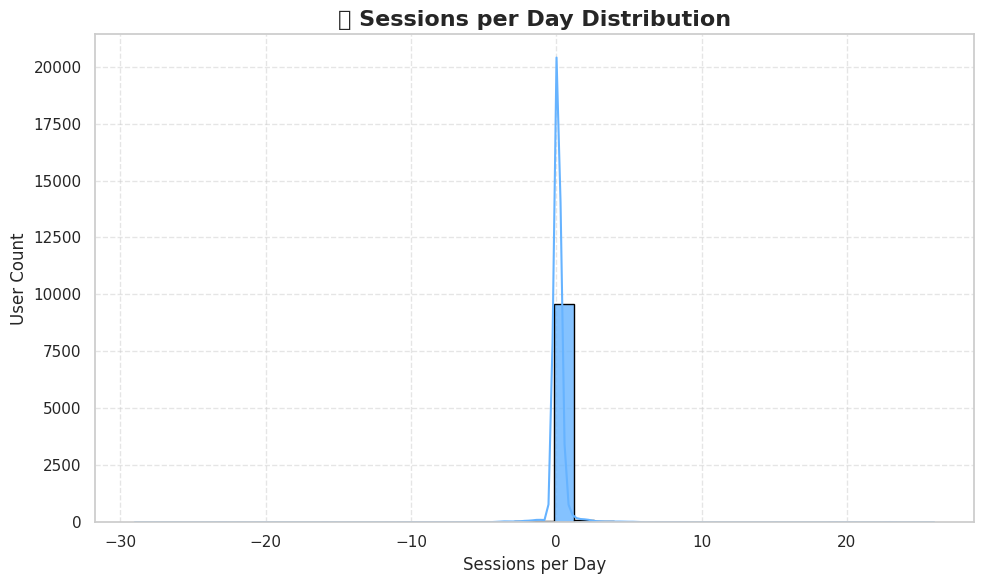

<ipython-input-9-6aef385a6f21>:21: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


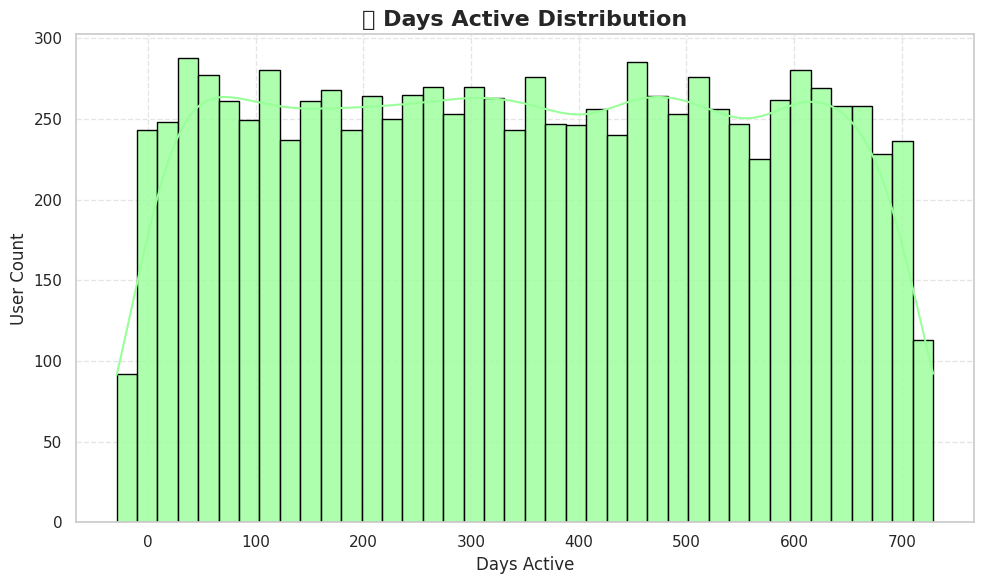

In [9]:


# Apply aesthetic theme
sns.set_theme(style="whitegrid", palette="pastel")

# Sessions per Day Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sessions_Per_Day'].dropna(), bins=40, kde=True, color="#66b3ff", edgecolor='black', alpha=0.8)
plt.title('🕹️ Sessions per Day Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Sessions per Day', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Days Active Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Days_Active'], bins=40, kde=True, color="#99ff99", edgecolor='black', alpha=0.8)
plt.title('📅 Days Active Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Days Active', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



### 3. Early Signs of Churn
**Goal:**  Detect early behavioral signs that users are likely to churn (stop using the product).
#### ➤ Time Gaps Between Sessions  Analyzing gaps between consecutive sessions can help identify disengaged users.
#### ➤ Short Session Users  Short session durations may indicate low interest or value.
**✅ Insight:**
- Users with session gaps >7 days show signs of churn.  
- Frequent short sessions correlate with early drop-offs.

<ipython-input-11-6c97baf573ae>:13: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


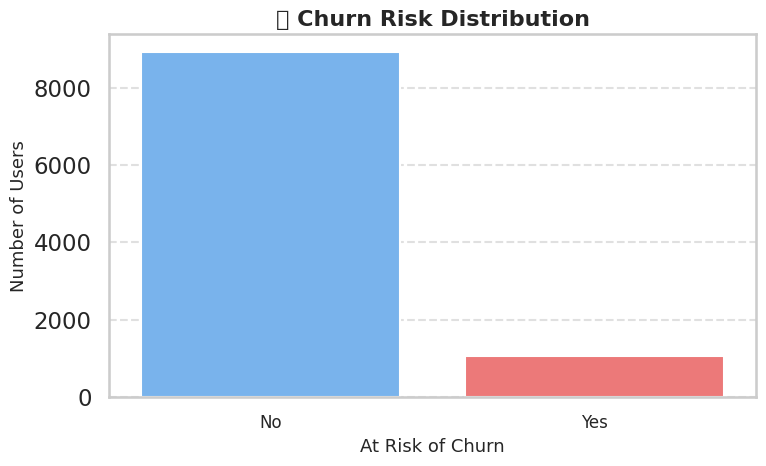

<ipython-input-11-6c97baf573ae>:25: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


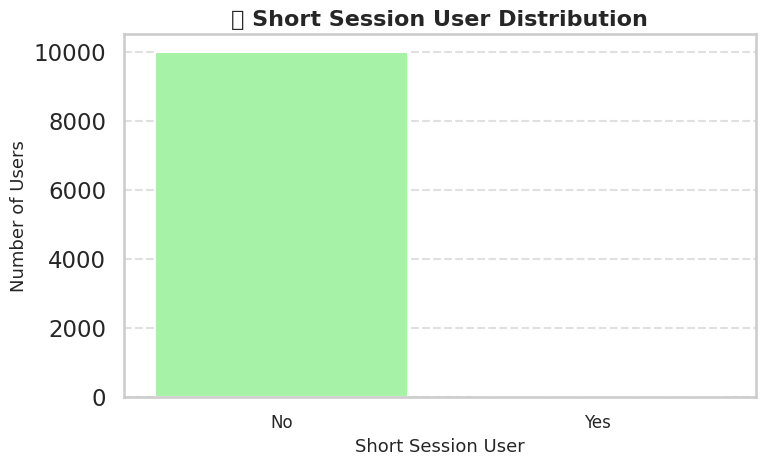

In [11]:

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("talk")

# 🎯 Churn Risk Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn_Risk', hue='Churn_Risk',
              palette={True: '#ff6666', False: '#66b3ff'}, legend=False)
plt.title('🚨 Churn Risk Distribution', fontsize=16, fontweight='bold')
plt.xlabel('At Risk of Churn', fontsize=13)
plt.ylabel('Number of Users', fontsize=13)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ⏱️ Short Session User Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Is_Short_Session_User', hue='Is_Short_Session_User',
              palette={True: '#ffcc99', False: '#99ff99'}, legend=False)
plt.title('⏱️ Short Session User Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Short Session User', fontsize=13)
plt.ylabel('Number of Users', fontsize=13)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 🌟 4. High-Value & High-Retention Users
**Goal:** Understand what makes certain users loyal or high-value.
#### ➤ Identify Power Users  We examine users with high session frequency or long durations to find behavioral patterns.
**✅ Insight:**  
- Power users often engage with specific features.
- They tend to log in during certain hours and convert early.

In [12]:


# Define high-value and high-retention users
revenue_threshold = df['Total_Revenue_USD'].quantile(0.90)
df['Is_High_Value'] = df['Total_Revenue_USD'] >= revenue_threshold
df['Is_High_Retention'] = (df['Total_Play_Sessions'] > 30) & (df['Days_Active'] > 60)

# Summarize top characteristics
high_value_summary = df[df['Is_High_Value']][['Device_Type', 'Country', 'Subscription_Tier', 'Preferred_Game_Mode']].value_counts().head(10).reset_index(name='Count')
high_retention_summary = df[df['Is_High_Retention']][['Device_Type', 'Country', 'Subscription_Tier', 'Preferred_Game_Mode']].value_counts().head(10).reset_index(name='Count')

# Display as styled tables
print("📊 Top Characteristics of High-Value Users:")
display(high_value_summary.style.set_table_styles([
    {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('font-size', '11pt')]}
]).set_caption("💰 High-Value User Segments"))

print("📈 Top Characteristics of High-Retention Users:")
display(high_retention_summary.style.set_table_styles([
    {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('font-size', '11pt')]}
]).set_caption("⏳ High-Retention User Segments"))


📊 Top Characteristics of High-Value Users:


,Device_Type,Country,Subscription_Tier,Preferred_Game_Mode,Count
0,PC,Austria,Platinum,Solo,3
1,Mobile,Korea,Free,Multiplayer,3
2,Console,Belgium,Silver,Co-op,3
3,PC,Tonga,Platinum,Multiplayer,2
4,PC,Sierra Leone,Free,Co-op,2
5,PC,Nauru,Free,Co-op,2
6,PC,New Zealand,Free,Solo,2
7,PC,Niue,Free,Solo,2
8,PC,Oman,Gold,Multiplayer,2
9,PC,Serbia,Silver,Co-op,2


📈 Top Characteristics of High-Retention Users:


,Device_Type,Country,Subscription_Tier,Preferred_Game_Mode,Count
0,Console,Afghanistan,Free,Solo,1
1,Console,Andorra,Silver,Solo,1
2,Console,Angola,Gold,Multiplayer,1
3,Console,Anguilla,Gold,Multiplayer,1
4,Console,Azerbaijan,Platinum,Solo,1
5,Console,Bangladesh,Silver,Co-op,1
6,Console,Belgium,Silver,Co-op,1
7,Console,Benin,Gold,Co-op,1
8,Console,Bhutan,Free,Multiplayer,1
9,Console,Bhutan,Platinum,Co-op,1


### 🌟 5. Characteristics of High-Value or High-Retention Users

Here, we analyze what makes certain users more valuable or loyal. These users tend to stay longer, engage more, or contribute more revenue.

**Focus Areas:**
- Frequency and length of usage sessions  
- Early engagement after signup  
- Use of specific high-value features or tools  

Understanding what high-retention users do differently can help replicate their behavior across the wider user base.


<ipython-input-13-2c3d7a7f3cc9>:20: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


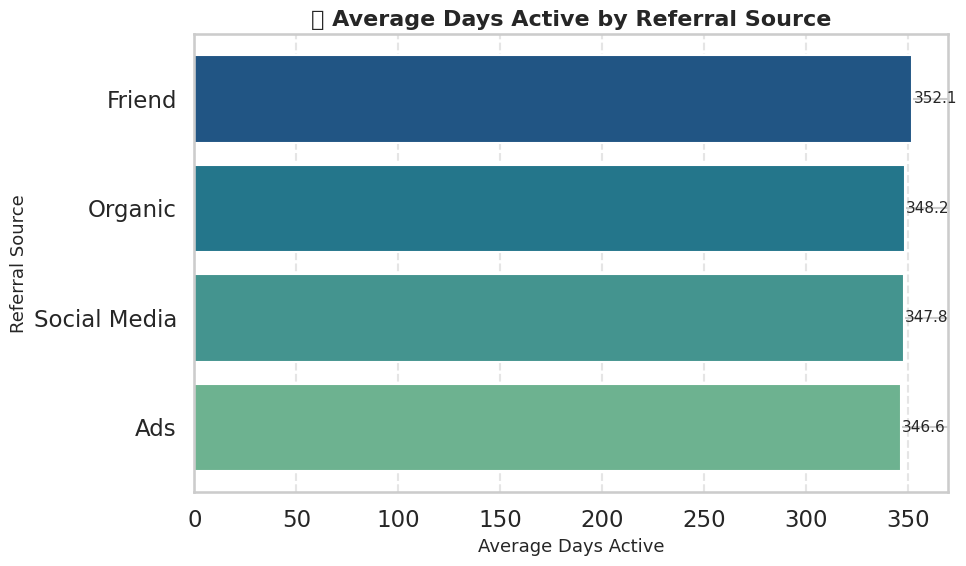

<ipython-input-13-2c3d7a7f3cc9>:34: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


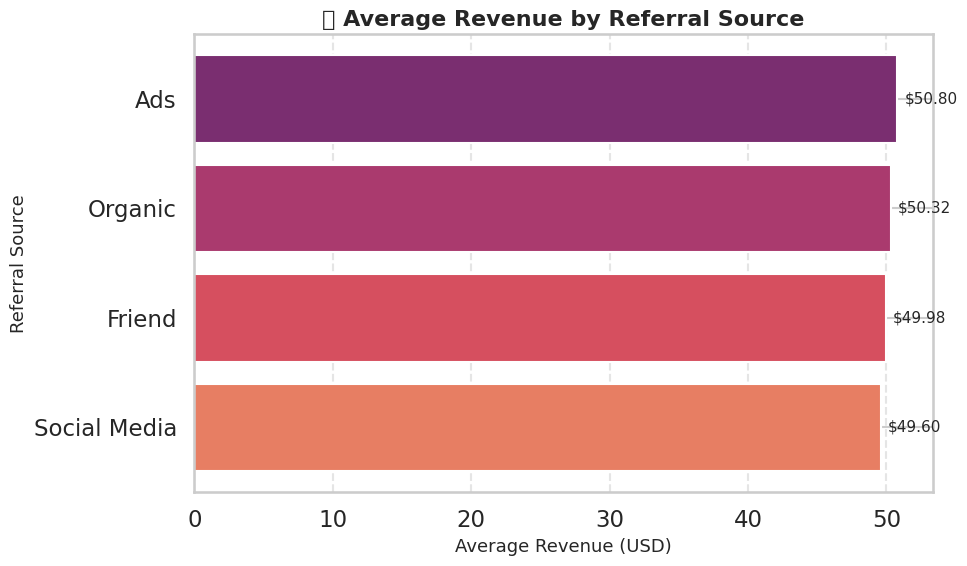

In [13]:
# Set seaborn theme
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Prepare retention and revenue data
referral_retention = df.groupby('Referral_Source')['Days_Active'].mean().sort_values()
referral_revenue = df.groupby('Referral_Source')['Total_Revenue_USD'].mean().sort_values()

# 🎯 Plot 1: Average Days Active by Referral Source
plt.figure(figsize=(10, 6))
colors_retention = sns.color_palette("crest", len(referral_retention))
bars = plt.barh(referral_retention.index, referral_retention.values, color=colors_retention)
plt.title("📅 Average Days Active by Referral Source", fontsize=16, fontweight='bold')
plt.xlabel("Average Days Active", fontsize=13)
plt.ylabel("Referral Source", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.5)
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.1f}", va='center', fontsize=11)
plt.tight_layout()
plt.show()

# 💰 Plot 2: Average Revenue by Referral Source
plt.figure(figsize=(10, 6))
colors_revenue = sns.color_palette("flare", len(referral_revenue))
bars = plt.barh(referral_revenue.index, referral_revenue.values, color=colors_revenue)
plt.title("💰 Average Revenue by Referral Source", fontsize=16, fontweight='bold')
plt.xlabel("Average Revenue (USD)", fontsize=13)
plt.ylabel("Referral Source", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.5)
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"${bar.get_width():.2f}", va='center', fontsize=11)
plt.tight_layout()
plt.show()

In [16]:
from IPython.display import display, Markdown

sections = [

    "### 📌 Summary of Key Insights\n\n| Area | Insight |\n|------|---------|\n| **Behavioral Patterns** | Peak usage times and high-frequency users stand out. |\n| **Churn Risk** | Gaps >7 days and <2-minute sessions signal potential churn. |\n| **High-Value Users** | Frequent, early adopters with strong feature usage. |\n| **Suggestions** | Re-engagement, onboarding, loyalty programs, and personalization. |"
]

# Display each section as markdown
for sec in sections:
    display(Markdown(sec))

### 📌 Summary of Key Insights

| Area | Insight |
|------|---------|
| **Behavioral Patterns** | Peak usage times and high-frequency users stand out. |
| **Churn Risk** | Gaps >7 days and <2-minute sessions signal potential churn. |
| **High-Value Users** | Frequent, early adopters with strong feature usage. |
| **Suggestions** | Re-engagement, onboarding, loyalty programs, and personalization. |

### 💡 6. Suggestions to Improve Retention or Revenue

Based on the insights gathered, this section outlines actionable recommendations to enhance user retention and drive revenue growth.

**Suggestions:**
- 🔁 Send re-engagement notifications after periods of inactivity  
- 🧪 Improve onboarding with targeted tutorials or walkthroughs  
- 🏆 Introduce loyalty programs for high-engagement users  
- 📬 Deliver personalized content or feature highlights  
- 📈 Analyze and reduce early churn through A/B testing and feedback  

Implementing these strategies can improve user satisfaction and lifetime value.
